# Predicting House Prices using Multi Linear Regression

In [55]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
import statsmodels.api as sm
import os
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from plotly.subplots import make_subplots
import plotly.graph_objects as go

path = "C://Users/pranshu/Python for data Science/Data Sets"
os.chdir(path)

In [3]:
data = pd.read_csv("Housing.csv")
housing_df = pd.DataFrame(data)
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


No null values in the dataset

In [5]:
housing_df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## Feature Engineering

Converting catagorical and binary features to dummy variables using one hot encoding technique. This will help us use catagorical variables to predict the value of house price.

In [11]:
#Maping the variables with yer/no values to 0 and 1 i.e into binary
binary_cols = ["mainroad", "guestroom", "basement", 'prefarea', 'hotwaterheating', 'airconditioning']
for i in binary_cols:
    housing_df[i] = housing_df[i].map({"yes": 1, "no" : 0})

In [14]:
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [15]:
#Creating dummy variables for the categorical column furnishing status
housing_df = pd.get_dummies(housing_df, drop_first= True)
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [25]:
#Let us cnvert the price of the houses to millions
housing_df["price"] = housing_df["price"].apply(lambda x: x/1000000)

## Exploratory Data Analysis

Let us study the trends and patterns in data using numerous plots

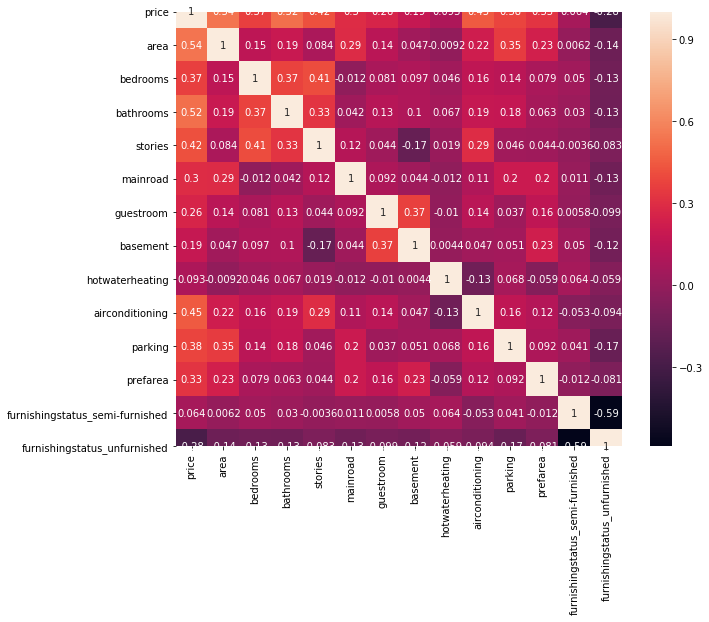

In [18]:
plt.figure(figsize = (10,8))
sns.heatmap(housing_df.corr(), annot = True)
plt.show()

Based on the above plot we can say that price of the houses is moderately correlated with area, bathrooms, stories, airconditioning, parking and bedrooms to name a few.

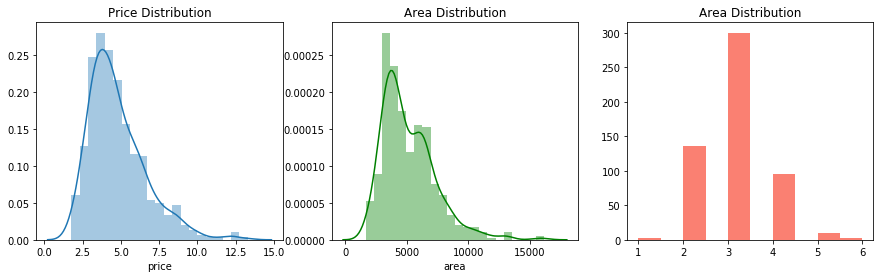

In [39]:
plt.figure(figsize = (15,4))
plt.subplot(1,3,1)
sns.distplot(housing_df["price"])
plt.title("Price Distribution")
plt.subplot(1,3,2)
sns.distplot(housing_df["area"], color = "g")
plt.title("Area Distribution")
plt.subplot(1,3,3)
plt.hist(housing_df["bedrooms"], color = "salmon")
plt.title("Area Distribution")
plt.show()

Maximum number of houses are priced around `4 Million`. Also the area distribution curve suggests that huge number of houses in data have area of approximately `4000 sq.ft`. 
More than `50%` of the houses have `3 bedrooms`.

In [45]:
pe.histogram(data_frame= housing_df, x = "mainroad", histnorm = "percent", width = 600, height = 400)

In [54]:
fig = make_subplots(rows = 1, cols =2)
fig.add_trace(go.Histogram(x = housing_df["mainroad"], histnorm = "percent", name = "Houses on main road"), 
             row =1, col = 1)
fig.add_trace(go.Histogram(x = housing_df["bathrooms"], histnorm = "percent", name = "Bathrooms"),
             row = 1, col = 2)

## Predicting house prices
<b> We will use 4 different techniques to predict the prices, namely: <b>
- Ordinary Least Squares    
    - Forward Selection
    - Backward Elimination
    - Recursive Feature Elimination
- Gradient Descent
- Ridge Regression
- Lasso Regression
- K-Nearest Neighbours

### Ordinary least squares

In [150]:
#splitting the dataframe into training and testing data
train_df, test_df = train_test_split(housing_df, train_size = 0.8, random_state = 42)

In [151]:
#Normalizing the features and response variable
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
scaler = MinMaxScaler()
train_df[num_vars] = scaler.fit_transform(train_df[num_vars])
train_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
46,0.550000,0.298969,0.4,0.333333,1.000000,1,0,0,0,1,0.333333,0,0,0
93,0.433333,0.381443,0.4,0.333333,0.000000,1,0,1,0,1,1.000000,0,1,0
335,0.206667,0.148866,0.2,0.000000,0.000000,1,0,1,0,1,0.666667,0,0,0
412,0.160000,0.065979,0.4,0.000000,0.333333,1,0,1,0,0,0.000000,1,0,1
471,0.120000,0.144330,0.4,0.000000,0.333333,1,0,0,0,0,0.000000,0,0,1


#### Model 1: FS

In [70]:
train_x = train_df["area"]
train_y = train_df["price"]

In [71]:
#Adding a constant for the intercept as the OLS method itself doesnot create one
train_x = sm.add_constant(train_x)

#Creating the model
model1 = sm.OLS(train_y, train_x).fit()
model1.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.283    
Dependent Variable: price            AIC:                -464.3793
Date:               2020-05-23 17:12 BIC:                -456.2240
No. Observations:   436              Log-Likelihood:     234.19   
Df Model:           1                F-statistic:        173.0    
Df Residuals:       434              Prob (F-statistic): 1.75e-33 
R-squared:          0.285            Scale:              0.020090 
---------------------------------------------------------------------
          Coef.     Std.Err.       t       P>|t|     [0.025    0.975]
---------------------------------------------------------------------
const     0.1395      0.0128    10.9333    0.0000    0.1144    0.1646
area      0.5899      0.0449    13.1515    0.0000    0.5018    0.6781
------------------------------------------------------------------
Omnibus:              78.264       Durbin-Watson:          1.894  
Prob(Omnibus):        0.000        Jarque-Bera (JB):       156.475
Skew:                 0.978        Prob(JB):               0.000  
Kurtosis:             5.187        Condition No.:          7      
==================================================================

"""

#### Model2: FS

In [72]:
train_x = train_df[["area", "bedrooms"]]
train_y = train_df["price"]

In [73]:
#Adding a constant for the intercept as the OLS method itself doesnot create one
train_x = sm.add_constant(train_x)

#Creating the model
model2 = sm.OLS(train_y, train_x).fit()
model2.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.368    
Dependent Variable: price            AIC:                -517.8881
Date:               2020-05-23 17:12 BIC:                -505.6551
No. Observations:   436              Log-Likelihood:     261.94   
Df Model:           2                F-statistic:        127.4    
Df Residuals:       433              Prob (F-statistic): 3.10e-44 
R-squared:          0.370            Scale:              0.017729 
--------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
--------------------------------------------------------------------
const        0.0219     0.0195    1.1253   0.2611   -0.0164   0.0602
area         0.5394     0.0427   12.6453   0.0000    0.4555   0.6232
bedrooms     0.3313     0.0432    7.6675   0.0000    0.2464   0.4162
------------------------------------------------------------------
Omnibus:              65.038       Durbin-Watson:          1.928  
Prob(Omnibus):        0.000        Jarque-Bera (JB):       124.273
Skew:                 0.844        Prob(JB):               0.000  
Kurtosis:             4.998        Condition No.:          8      
==================================================================

"""

The R-squared value increased to 0.38 from 0.285

#### Model 3: FS

In [74]:
train_x = train_df[["area", "bedrooms", "mainroad"]]
train_y = train_df["price"]

In [75]:
#Adding a constant for the intercept as the OLS method itself doesnot create one
train_x = sm.add_constant(train_x)

#Creating the model
model3 = sm.OLS(train_y, train_x).fit()
model3.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.394    
Dependent Variable: price            AIC:                -535.8867
Date:               2020-05-23 17:13 BIC:                -519.5761
No. Observations:   436              Log-Likelihood:     271.94   
Df Model:           3                F-statistic:        95.47    
Df Residuals:       432              Prob (F-statistic): 2.05e-47 
R-squared:          0.399            Scale:              0.016973 
--------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
--------------------------------------------------------------------
const       -0.0396     0.0234   -1.6904   0.0917   -0.0857   0.0064
area         0.4816     0.0437   11.0291   0.0000    0.3957   0.5674
bedrooms     0.3396     0.0423    8.0248   0.0000    0.2564   0.4227
mainroad     0.0842     0.0187    4.5030   0.0000    0.0474   0.1209
------------------------------------------------------------------
Omnibus:              67.813       Durbin-Watson:          1.955  
Prob(Omnibus):        0.000        Jarque-Bera (JB):       133.906
Skew:                 0.863        Prob(JB):               0.000  
Kurtosis:             5.096        Condition No.:          11     
==================================================================

"""

Apparently from the model it can be seen that the addition of main road feature is not explaining much of variation in thee data

#### Model 4: FS

In [81]:
train_x = train_df[["area", "bedrooms", "mainroad", "bathrooms"]]
train_y = train_df["price"]

In [82]:
#Adding a constant for the intercept as the OLS method itself doesnot create one
train_x = sm.add_constant(train_x)

#Creating the model
model4 = sm.OLS(train_y, train_x).fit()
model4.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.517    
Dependent Variable: price            AIC:                -633.3529
Date:               2020-05-23 17:16 BIC:                -612.9647
No. Observations:   436              Log-Likelihood:     321.68   
Df Model:           4                F-statistic:        117.4    
Df Residuals:       431              Prob (F-statistic): 1.27e-67 
R-squared:          0.521            Scale:              0.013542 
--------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
--------------------------------------------------------------------
const        0.0022     0.0213    0.1031   0.9179   -0.0397   0.0441
area         0.4218     0.0394   10.7032   0.0000    0.3444   0.4993
bedrooms     0.1802     0.0407    4.4240   0.0000    0.1001   0.2602
mainroad     0.0831     0.0167    4.9762   0.0000    0.0503   0.1159
bathrooms    0.4052     0.0386   10.5093   0.0000    0.3294   0.4810
------------------------------------------------------------------
Omnibus:              63.955       Durbin-Watson:          1.923  
Prob(Omnibus):        0.000        Jarque-Bera (JB):       140.230
Skew:                 0.780        Prob(JB):               0.000  
Kurtosis:             5.299        Condition No.:          12     
==================================================================

"""

R-sqaured value increased to 0.52 from 0.399 due to addition of Bathrooms feature. This means that the number of bathroooms in a house have an association with the price of the house.

#### Model 5: FSS

In [83]:
train_x = train_df[["area", "bedrooms", "mainroad", "bathrooms", "airconditioning"]]
train_y = train_df["price"]

In [85]:
#Adding a constant for the intercept as the OLS method itself doesnot create one
train_x = sm.add_constant(train_x)

#Creating the model
model5 = sm.OLS(train_y, train_x).fit()
model5.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.587    
Dependent Variable: price            AIC:                -700.2895
Date:               2020-05-23 17:19 BIC:                -675.8237
No. Observations:   436              Log-Likelihood:     356.14   
Df Model:           5                F-statistic:        124.4    
Df Residuals:       430              Prob (F-statistic): 3.05e-81 
R-squared:          0.591            Scale:              0.011589 
-------------------------------------------------------------------
                 Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
-------------------------------------------------------------------
const            0.0103    0.0197   0.5237  0.6007  -0.0285  0.0491
area             0.3768    0.0368  10.2300  0.0000   0.3044  0.4492
bedrooms         0.1397    0.0380   3.6787  0.0003   0.0651  0.2143
mainroad         0.0725    0.0155   4.6780  0.0000   0.0420  0.1029
bathrooms        0.3677    0.0359  10.2318  0.0000   0.2970  0.4383
airconditioning  0.1008    0.0117   8.5824  0.0000   0.0777  0.1239
------------------------------------------------------------------
Omnibus:              73.793       Durbin-Watson:          1.947  
Prob(Omnibus):        0.000        Jarque-Bera (JB):       160.983
Skew:                 0.893        Prob(JB):               0.000  
Kurtosis:             5.382        Condition No.:          13     
==================================================================

"""

R-squared value increased to 0.59 after addition of airconditioning variable in the model. This shows that airconditioning also has an association with price of the house.

#### Model 6: FS

In [93]:
train_x = train_df[["area", "bedrooms", "mainroad", "bathrooms", "airconditioning", "parking"]]
train_y = train_df["price"]

In [94]:
#Adding a constant for the intercept as the OLS method itself doesnot create one
train_x = sm.add_constant(train_x)

#Creating the model
model6 = sm.OLS(train_y, train_x).fit()
model6.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.596    
Dependent Variable: price            AIC:                -709.7608
Date:               2020-05-23 17:25 BIC:                -681.2174
No. Observations:   436              Log-Likelihood:     361.88   
Df Model:           6                F-statistic:        108.1    
Df Residuals:       429              Prob (F-statistic): 1.31e-82 
R-squared:          0.602            Scale:              0.011314 
-------------------------------------------------------------------
                  Coef.   Std.Err.    t     P>|t|    [0.025  0.975]
-------------------------------------------------------------------
const             0.0121    0.0195  0.6210  0.5350  -0.0262  0.0505
area              0.3446    0.0376  9.1597  0.0000   0.2707  0.4186
bedrooms          0.1344    0.0375  3.5786  0.0004   0.0606  0.2082
mainroad          0.0669    0.0154  4.3481  0.0000   0.0367  0.0972
bathrooms         0.3558    0.0357  9.9727  0.0000   0.2857  0.4259
airconditioning   0.0970    0.0117  8.3215  0.0000   0.0741  0.1200
parking           0.0657    0.0194  3.3819  0.0008   0.0275  0.1039
------------------------------------------------------------------
Omnibus:              54.614       Durbin-Watson:          1.912  
Prob(Omnibus):        0.000        Jarque-Bera (JB):       103.529
Skew:                 0.725        Prob(JB):               0.000  
Kurtosis:             4.896        Condition No.:          13     
==================================================================

"""

In [103]:
train_x = train_df[["area", "bedrooms", "mainroad", "bathrooms", "airconditioning", "parking", "stories"]]
train_y = train_df["price"]

In [104]:
#Adding a constant for the intercept as the OLS method itself doesnot create one
train_x = sm.add_constant(train_x)

#Creating the model
model7 = sm.OLS(train_y, train_x).fit()
model7.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.615    
Dependent Variable: price            AIC:                -728.9722
Date:               2020-05-23 17:26 BIC:                -696.3511
No. Observations:   436              Log-Likelihood:     372.49   
Df Model:           7                F-statistic:        100.1    
Df Residuals:       428              Prob (F-statistic): 4.63e-86 
R-squared:          0.621            Scale:              0.010802 
-------------------------------------------------------------------
                  Coef.   Std.Err.    t     P>|t|    [0.025  0.975]
-------------------------------------------------------------------
const             0.0192    0.0191  1.0053  0.3153  -0.0184  0.0568
area              0.3573    0.0369  9.6934  0.0000   0.2849  0.4298
bedrooms          0.0785    0.0386  2.0311  0.0429   0.0025  0.1544
mainroad          0.0583    0.0152  3.8442  0.0001   0.0285  0.0881
bathrooms         0.3280    0.0354  9.2734  0.0000   0.2585  0.3976
airconditioning   0.0830    0.0118  7.0385  0.0000   0.0598  0.1062
parking           0.0723    0.0190  3.7973  0.0002   0.0349  0.1097
stories           0.0937    0.0203  4.6192  0.0000   0.0538  0.1335
------------------------------------------------------------------
Omnibus:              69.144       Durbin-Watson:          1.918  
Prob(Omnibus):        0.000        Jarque-Bera (JB):       156.190
Skew:                 0.828        Prob(JB):               0.000  
Kurtosis:             5.420        Condition No.:          13     
==================================================================

"""

In [105]:
train_x = train_df[["area", "bedrooms", "bathrooms", "airconditioning","parking", "stories", "prefarea"]]
train_y = train_df["price"]

In [106]:
#Adding a constant for the intercept as the OLS method itself doesnot create one
train_x = sm.add_constant(train_x)

#Creating the model
model7 = sm.OLS(train_y, train_x).fit()
model5.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.615    
Dependent Variable: price            AIC:                -728.9722
Date:               2020-05-23 17:26 BIC:                -696.3511
No. Observations:   436              Log-Likelihood:     372.49   
Df Model:           7                F-statistic:        100.1    
Df Residuals:       428              Prob (F-statistic): 4.63e-86 
R-squared:          0.621            Scale:              0.010802 
-------------------------------------------------------------------
                  Coef.   Std.Err.    t     P>|t|    [0.025  0.975]
-------------------------------------------------------------------
const             0.0192    0.0191  1.0053  0.3153  -0.0184  0.0568
area              0.3573    0.0369  9.6934  0.0000   0.2849  0.4298
bedrooms          0.0785    0.0386  2.0311  0.0429   0.0025  0.1544
mainroad          0.0583    0.0152  3.8442  0.0001   0.0285  0.0881
bathrooms         0.3280    0.0354  9.2734  0.0000   0.2585  0.3976
airconditioning   0.0830    0.0118  7.0385  0.0000   0.0598  0.1062
parking           0.0723    0.0190  3.7973  0.0002   0.0349  0.1097
stories           0.0937    0.0203  4.6192  0.0000   0.0538  0.1335
------------------------------------------------------------------
Omnibus:              69.144       Durbin-Watson:          1.918  
Prob(Omnibus):        0.000        Jarque-Bera (JB):       156.190
Skew:                 0.828        Prob(JB):               0.000  
Kurtosis:             5.420        Condition No.:          13     
==================================================================

"""

In [112]:
train_x = train_df[["area", "bedrooms", "bathrooms", "airconditioning","parking", "stories", "basement"]]
train_y = train_df["price"]

In [113]:
#Adding a constant for the intercept as the OLS method itself doesnot create one
train_x = sm.add_constant(train_x)

#Creating the model
model8 = sm.OLS(train_y, train_x).fit()
model8.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.632    
Dependent Variable: price            AIC:                -749.1165
Date:               2020-05-23 17:28 BIC:                -716.4954
No. Observations:   436              Log-Likelihood:     382.56   
Df Model:           7                F-statistic:        107.7    
Df Residuals:       428              Prob (F-statistic): 2.52e-90 
R-squared:          0.638            Scale:              0.010314 
-------------------------------------------------------------------
                 Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
-------------------------------------------------------------------
const            0.0466    0.0155   3.0130  0.0027   0.0162  0.0770
area             0.3942    0.0349  11.2838  0.0000   0.3255  0.4628
bedrooms         0.0323    0.0380   0.8515  0.3949  -0.0423  0.1070
bathrooms        0.3045    0.0347   8.7783  0.0000   0.2363  0.3727
airconditioning  0.0745    0.0116   6.4038  0.0000   0.0517  0.0974
parking          0.0812    0.0185   4.3957  0.0000   0.0449  0.1176
stories          0.1384    0.0205   6.7439  0.0000   0.0981  0.1787
basement         0.0638    0.0107   5.9762  0.0000   0.0428  0.0848
------------------------------------------------------------------
Omnibus:              62.646       Durbin-Watson:          1.906  
Prob(Omnibus):        0.000        Jarque-Bera (JB):       150.477
Skew:                 0.734        Prob(JB):               0.000  
Kurtosis:             5.476        Condition No.:          11     
==================================================================

"""

Addition of basement variable increased the r-squared value but at the same time the bedroom feature became insignificant

#### Model 9: Fss

In [117]:
train_x = train_df[["area", "basement", "bathrooms", "airconditioning","parking", "stories", "prefarea"]]
train_y = train_df["price"]

In [118]:
#Adding a constant for the intercept as the OLS method itself doesnot create one
train_x = sm.add_constant(train_x)

#Creating the model
model9 = sm.OLS(train_y, train_x).fit()
model9.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.657    
Dependent Variable: price            AIC:                -779.6347
Date:               2020-05-23 17:29 BIC:                -747.0136
No. Observations:   436              Log-Likelihood:     397.82   
Df Model:           7                F-statistic:        120.0    
Df Residuals:       428              Prob (F-statistic): 8.64e-97 
R-squared:          0.662            Scale:              0.0096171
-------------------------------------------------------------------
                  Coef.   Std.Err.     t     P>|t|   [0.025  0.975]
-------------------------------------------------------------------
const             0.0547    0.0105   5.2178  0.0000  0.0341  0.0753
area              0.3600    0.0343  10.5056  0.0000  0.2926  0.4274
basement          0.0523    0.0105   5.0001  0.0000  0.0317  0.0728
bathrooms         0.3243    0.0324   9.9974  0.0000  0.2605  0.3880
airconditioning   0.0731    0.0112   6.4983  0.0000  0.0510  0.0951
parking           0.0795    0.0178   4.4603  0.0000  0.0445  0.1146
stories           0.1408    0.0187   7.5268  0.0000  0.1041  0.1776
prefarea          0.0657    0.0117   5.6400  0.0000  0.0428  0.0886
------------------------------------------------------------------
Omnibus:              84.542       Durbin-Watson:          1.904  
Prob(Omnibus):        0.000        Jarque-Bera (JB):       242.960
Skew:                 0.911        Prob(JB):               0.000  
Kurtosis:             6.171        Condition No.:          10     
==================================================================

"""

Removing the bedrooms variable from the previous further improved the model i.e increased the r-squared value to 0.66

In [120]:
train_x = train_df[["area", "basement", "bathrooms", "airconditioning","parking", "stories", "prefarea", "guestroom"]]
train_y = train_df["price"]

In [121]:
#Adding a constant for the intercept as the OLS method itself doesnot create one
train_x = sm.add_constant(train_x)

#Creating the model
model10 = sm.OLS(train_y, train_x).fit()
model10.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.658    
Dependent Variable: price            AIC:                -780.4627
Date:               2020-05-23 17:32 BIC:                -743.7639
No. Observations:   436              Log-Likelihood:     399.23   
Df Model:           8                F-statistic:        105.8    
Df Residuals:       427              Prob (F-statistic): 2.48e-96 
R-squared:          0.665            Scale:              0.0095773
-------------------------------------------------------------------
                 Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
-------------------------------------------------------------------
const            0.0562    0.0105   5.3560  0.0000   0.0356  0.0769
area             0.3515    0.0346  10.1652  0.0000   0.2835  0.4194
basement         0.0450    0.0113   3.9843  0.0001   0.0228  0.0672
bathrooms        0.3246    0.0324  10.0265  0.0000   0.2609  0.3882
airconditioning  0.0719    0.0112   6.3929  0.0000   0.0498  0.0940
parking          0.0813    0.0178   4.5613  0.0000   0.0463  0.1163
stories          0.1379    0.0188   7.3519  0.0000   0.1010  0.1748
prefarea         0.0644    0.0117   5.5270  0.0000   0.0415  0.0873
guestroom        0.0229    0.0137   1.6669  0.0963  -0.0041  0.0499
------------------------------------------------------------------
Omnibus:              85.168       Durbin-Watson:          1.915  
Prob(Omnibus):        0.000        Jarque-Bera (JB):       243.878
Skew:                 0.919        Prob(JB):               0.000  
Kurtosis:             6.170        Condition No.:          10     
==================================================================

"""

Guestroom feature is not useful or is unable to explain any variation in data.

In [132]:
train_x = train_df[["area", "basement", "bathrooms", "airconditioning","parking", "stories", 
                    "prefarea", "furnishingstatus_unfurnished", "mainroad", "hotwaterheating"]]
train_y = train_df["price"]

In [133]:
#Adding a constant for the intercept as the OLS method itself doesnot create one
train_x = sm.add_constant(train_x)

#Creating the model
model11 = sm.OLS(train_y, train_x).fit()
model11.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
============================================================================
Model:                  OLS                 Adj. R-squared:        0.675    
Dependent Variable:     price               AIC:                   -800.2758
Date:                   2020-05-23 17:39    BIC:                   -755.4218
No. Observations:       436                 Log-Likelihood:        411.14   
Df Model:               10                  F-statistic:           91.34    
Df Residuals:           425                 Prob (F-statistic):    2.66e-99 
R-squared:              0.682               Scale:                 0.0091110
----------------------------------------------------------------------------
                              Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
----------------------------------------------------------------------------
const                         0.0460   0.0148  3.1005 0.0021  0.0169  0.0752
area                          0.3382   0.0341  9.9111 0.0000  0.2711  0.4052
basement                      0.0459   0.0103  4.4640 0.0000  0.0257  0.0661
bathrooms                     0.3205   0.0317 10.1127 0.0000  0.2582  0.3828
airconditioning               0.0775   0.0111  6.9899 0.0000  0.0557  0.0993
parking                       0.0644   0.0176  3.6552 0.0003  0.0297  0.0990
stories                       0.1272   0.0184  6.9021 0.0000  0.0909  0.1634
prefarea                      0.0619   0.0115  5.3756 0.0000  0.0392  0.0845
furnishingstatus_unfurnished -0.0320   0.0102 -3.1248 0.0019 -0.0521 -0.0119
mainroad                      0.0348   0.0141  2.4629 0.0142  0.0070  0.0626
hotwaterheating               0.0649   0.0213  3.0482 0.0024  0.0230  0.1067
----------------------------------------------------------------------------
Omnibus:                  79.530          Durbin-Watson:             1.888  
Prob(Omnibus):            0.000           Jarque-Bera (JB):          220.518
Skew:                     0.870           Prob(JB):                  0.000  
Kurtosis:                 6.019           Condition No.:             12     
============================================================================

"""

`Furnishingstatus_Unfurnished` feature is able to show some variation in data and is negatively impacting the price which is obvious considering an unfurnished house will be pricedd lower than others. Apart from this, factors such as whether the house on `main road` or not or is there `hot water heating` in th house or not are also contributing factors to the price of the house.

- After studying all the features we have found that factors such as presence of guestroom and furnishin type- semifurnished do not have any association with the price of the house.
- The number of bedrooms in the house is associated with the price of the house but it is correlated to other features as well due to which the variation explained by this feature are explained by other features.

<b> Model 11 has an R-squared value of `0.68` <b>

#### Residual Analysis
Let us do resiual analysis on the Model no. 11 to check for validity of assumptions.

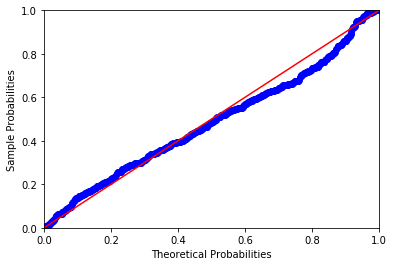

In [137]:
#Check for normality
residuals = model11.resid
probplot = sm.ProbPlot(residuals)
probplot.ppplot(line = "45")
plt.show()

The residuals are approximately normally distributed

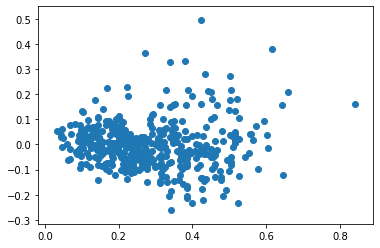

In [140]:
#Check for homoscedasticity
plt.scatter(y = residuals, x = model11.fittedvalues)

As per the above plots we can say that the assumptions are validated i.e. the error terms are normally distributed and the variance of errors is constant.

In [152]:
test_df[num_vars] = scaler.transform(test_df[num_vars])
test_x = test_df[["area", "basement", "bathrooms", "airconditioning","parking", "stories", 
                    "prefarea", "furnishingstatus_unfurnished", "mainroad", "hotwaterheating"]]
test_x = sm.add_constant(test_x)
test_y = test_df["price"]
y_pred = model11.predict(test_x)

In [156]:
print("The R-squared value on test dataset is ", round(r2_score(test_y, y_pred),2),"and training set is", 
      round(r2_score(train_y, model11.fittedvalues),2))

The R-squared value on test dataset is  0.65 and training set is 0.68


Therefore we can conclude that our model is good enough to interpolate house prices. 